In [1]:
from importlib import reload

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('../diagnostics/')
import model_diagnostics; reload(model_diagnostics)
from model_diagnostics import ModelDiagnostics
import xarray as xr

Using TensorFlow backend.


In [3]:
model_dir = '/export/home/srasp/repositories/CBRAIN-Keras-Diagnostics/keras_network/models/'
model_path = model_dir + 'B001_purecrm_ess_sample1_base.h5'

In [12]:
pre_dir = '/scratch/srasp/preprocessed_data/'

In [18]:
def get_purecrm_stats(model_name):
    model_path = model_dir + model_name + '.h5'
    diag = ModelDiagnostics(
        model_path, 
        pre_dir + 'purecrm_ess_valid_sample1_features.nc',
        pre_dir + 'purecrm_ess_valid_sample1_targets.nc',
        pre_dir + 'purecrm_ess_train_sample1_norm.nc'
    )
    diag.compute_stats(compute_SPDT_SPDQ=True)
    print(diag.mean_stats())
    return diag

In [14]:
diag = ModelDiagnostics(
    model_path, 
    pre_dir + 'purecrm_ess_valid_sample1_features.nc',
    pre_dir + 'purecrm_ess_valid_sample1_targets.nc',
    pre_dir + 'purecrm_ess_train_sample1_norm.nc'
)

In [17]:
diag.compute_stats(compute_SPDT_SPDQ=True)

  0%|          | 1/2868 [00:00<05:11,  9.20it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:35<00:00, 13.28it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 239.035288736


In [19]:
diag.mean_stats()

../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


,bias,mse,pred_var,true_var,expl_var_cut9
SPDQ,7.00779e-10,1.32574e-15,8.70507e-16,2.25854e-15,0.256709
SPDT,-8.98443e-07,1.1248e-09,1.05161e-09,2.22517e-09,0.407909
QRL,1.21491e-06,2.15997e-10,8.75047e-11,3.13624e-10,0.332738
QRS,-3.67374e-07,2.79665e-11,1.55369e-10,1.9229e-10,0.665941
all,-1.25518e-08,3.42191e-10,3.23621e-10,6.82771e-10,0.415824


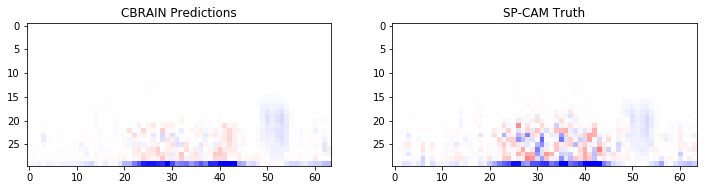

In [21]:
diag.plot_double_lat_lev_slice('SPDQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

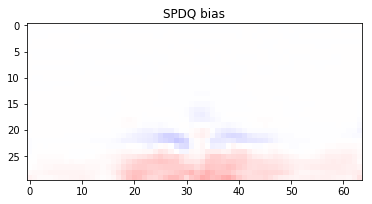

In [22]:
diag.plot_stat_lat_lev_mean('bias', 'SPDQ', vmin=-5e-8, vmax=5e-8, cmap='bwr')

In [24]:
get_purecrm_stats('B002_purecrm_ess_sample1_deep1')

  0%|          | 1/2868 [00:00<07:54,  6.05it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [04:13<00:00, 11.30it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 463.654335
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  3.05095e-09  3.28221e-15  1.51087e-23  2.25854e-15     -0.109064
SPDT -4.13869e-06  2.46575e-09  2.87542e-17  2.22517e-09    -0.0791648
QRL   2.62534e-06   3.7786e-10  2.14553e-17  3.13624e-10     -0.142527
QRS  -6.58985e-06  3.04376e-10   2.3486e-17   1.9229e-10     -0.448904
all  -2.02503e-06  7.86996e-10  1.84239e-17  6.82771e-10     -0.194915


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [ ]:
get_purecrm_stats('B003_purecrm_ess_sample1_tanh')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:47<00:00, 12.62it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 267.624974687
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  7.23547e-10  1.36536e-15  8.32953e-16  2.25854e-15      0.471466
SPDT -9.62342e-07  1.14744e-09  1.00434e-09  2.22517e-09       0.40612
QRL   1.37961e-06  2.31197e-10  6.15432e-11  3.13624e-10      0.331528
QRS  -4.51383e-07   3.1669e-11  1.50245e-10   1.9229e-10      0.627723
all  -8.34887e-09  3.52578e-10  3.04032e-10  6.82771e-10      0.459209


In [ ]:
get_purecrm_stats('B004_purecrm_ess_sample1_mse')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


 44%|████▍     | 1268/2868 [01:30<01:53, 14.04it/s]